<a href="https://colab.research.google.com/github/juntaoduan/product-CLT/blob/main/product_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import random, numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

- Plot the histogram of a vector D

In [6]:
def plot_hist(D):       
    # best fit of data
    (mu, std) = norm.fit(D)

    # the histogram of the data
    plt.figure(figsize=(20,10))
    plt.hist(D, 100, density = True, facecolor='green', alpha=0.75)

    # add a 'fited normal' density
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 1000)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=1)

    #plot
    plt.xlabel('')
    plt.ylabel('Probability')
    plt.title(r'$\mathrm{Histogram:\ }\ \mu=%.3f,\ \sigma=%.3f$' %(mu, std))
    plt.grid(True)

    plt.show()

- difference between cdf of D and cdf of standard normal

In [11]:
def cdf_diff(X):
    t =  np.linspace(-4, 4, 10000)
    standard_cdf = norm.cdf(t, 0, 1)
    def empirical_cdf(X,t):
        X.sort(axis=0) #increasing order
        X= np.squeeze(X) # orginally (n,1), remove column index --> (n,)
        # side='right' because we want Pr(X <= t)
        return (np.searchsorted(X, t, side='right') + 1) / len(X)
    X_cdf = empirical_cdf(D,t)
    return X_cdf - standard_cdf

# 1. Product-CLT

In [7]:

def prod_CLT(n, samples):
    D=np.zeros((samples,1))
    for i in range(len(D)):
        x = np.random.normal(0,1,(n,))
        z = np.random.normal(0,1,(n,))
        D[i] = (x.dot(z))/(n**0.5)
    return D
n=100
samples =1000
D =prod_CLT(n, samples)



- plot 10000 samples of  $$D = \frac{1}{\sqrt{n}}\sum X_i Z_i$$

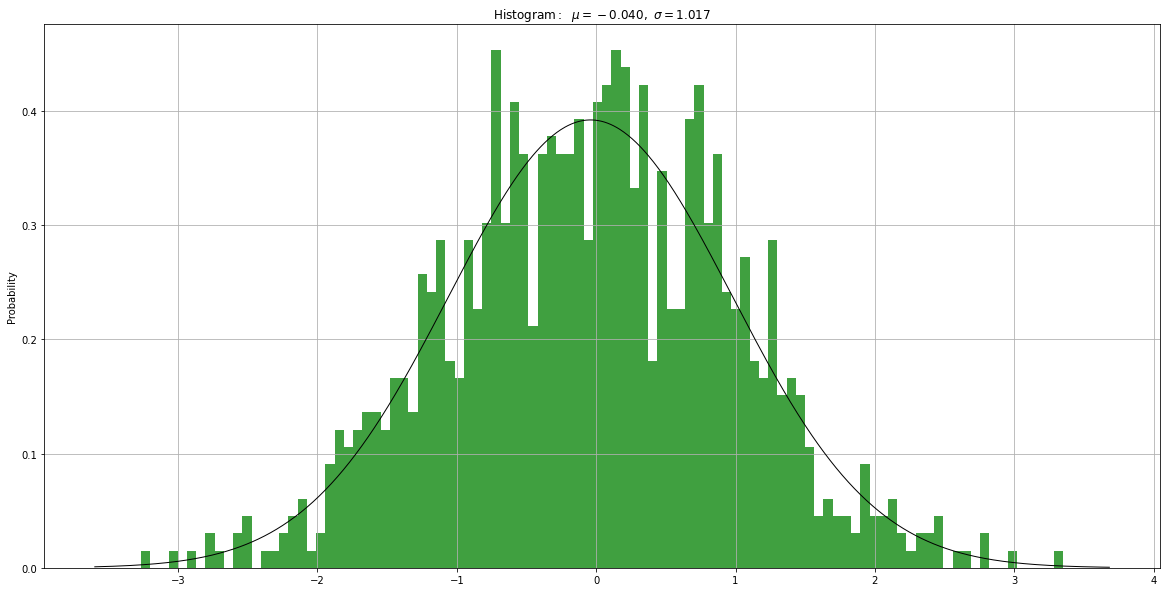

In [8]:
plot_hist(D)

- computes empirical cdf error to see the rate of convergence

The following picture exhibits behavior of Browninan motion. This is the reasonable since the errors are not independent, but rather the consecutive differences are going to be independent.

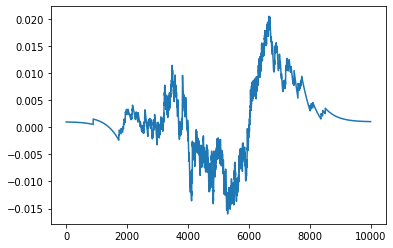

Average absolute difference of CDF between D and standard normal, 0.004594


In [3]:

diff = cdf_diff(D)
plt.plot(diff)
plt.show()
print('Average absolute difference of CDF between D and standard normal, %.6f' %abs(diff).mean())

In [4]:
k=10
samples =1000
n_list =  [i*100 for i in range(1,k+1)]
result = np.zeros(k)
for i in range(k):
    D= prod_CLT(n_list[i], samples)
    diff = cdf_diff(D)
    result[i] = abs(diff).max() # look at max since the error is bounded by O(1/sqrt(n))

- Plot the CDF abs-error
From the picture, we do not observe a $O(\frac{1}{\sqrt{n}})$ pattern, this is because vector dimensions $n$ are too close, the rate is not distinguishable.

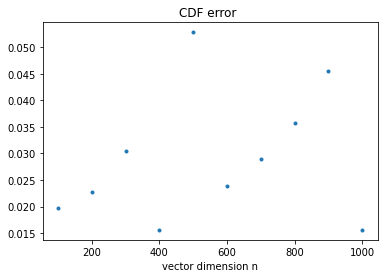

In [5]:
plt.plot(n_list, result,'.')
plt.xlabel('vector dimension n')
plt.title('CDF error ')
plt.show()

## 1-2 non-normal random variables

In [9]:
def prod_CLT(n, samples):
    # https://stats.stackexchange.com/questions/447139/fourth-moment-bound-for-unit-variance-distribution
    def fat_Kurtosis(n):
        a = 10
        b = a**(-2)
        return np.random.choice([a, -a, 0], size=(n,), replace=True, p=[b/2, b/2, 1-b])
        # mean=0, variance = a^2 b =1, kurtosis = a^4*b =a^2

    D=np.zeros((samples,1))
    for i in range(len(D)):
        x= fat_Kurtosis(n) 
        z = fat_Kurtosis(n) 
        D[i] = (x.dot(z))/(n**0.5)
    return D
n=100000
samples =100

D = prod_CLT(n, samples)
# D[D !=0]
sum(D**4)/samples # four-th moment

array([2.0213])

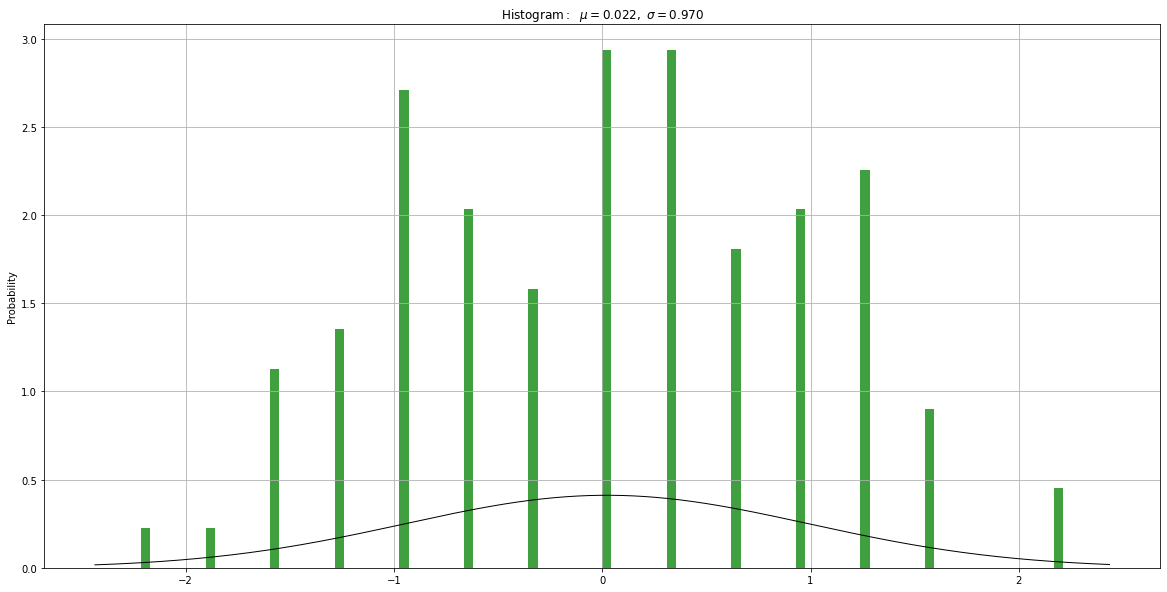

In [10]:
plot_hist(D)

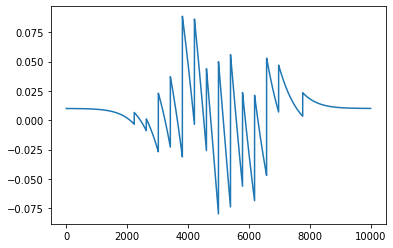

Mean absolute difference of CDF between D and standard normal, 0.018005


In [12]:
diff = cdf_diff(D)
plt.plot(diff)
plt.show()
print('Mean absolute difference of CDF between D and standard normal, %.6f' %abs(diff).mean())

# 2. Random projection Product-CLT 

## 2-1. Random projection Product-CLT ($m/n \to 0$)

In [13]:

def Rand_prod_CLT(n, m, samples):
    # https://stats.stackexchange.com/questions/447139/fourth-moment-bound-for-unit-variance-distribution
    def fat_Kurtosis(m,n):
        a = 10
        b = a**(-2)
        return np.random.choice([a, -a, 0], size=(m,n), replace=True, p=[b/2, b/2, 1-b])
        # mean=0, variance = a^2 b =1, kurtosis = a^4*b =a^2

    S= fat_Kurtosis(m,n) # we use the same random matrix to save some time
    D=np.zeros((samples,1))
    for i in range(len(D)):
        x= np.squeeze(fat_Kurtosis(n,1)) #x = np.random.normal(0,1,(n,))
        z = np.squeeze(fat_Kurtosis(n,1)) # np.random.normal(0,1,(n,))
        #    S= fat_Kurtosis(m,n) consume too much computation
        x = S.dot(x)
        z = S.dot(z)
        D[i] = (x.dot(z))/(n* m**0.5)
    return D



In [14]:
m=1
n=1000000
samples =1000
D = Rand_prod_CLT(n, m, samples)
sum(D**4)/samples

array([9.59892709])

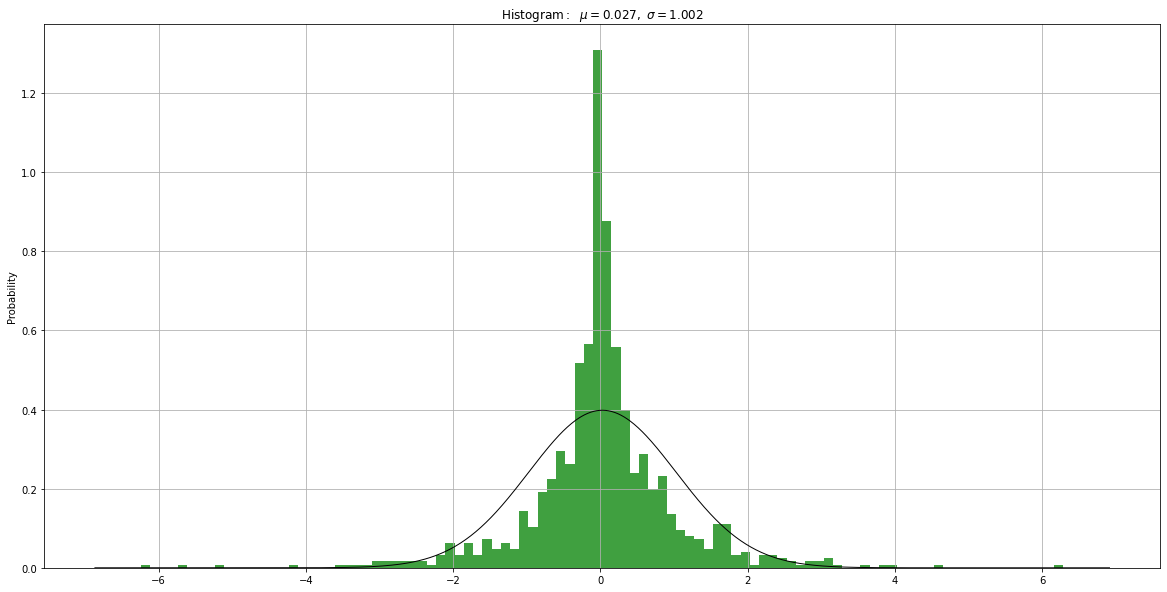

In [15]:
plot_hist(D)

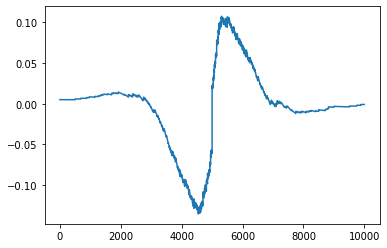

Average absolute difference of CDF between D and standard normal, 0.030625


In [16]:
diff = cdf_diff(D)
plt.plot(diff)
plt.show()
print('Average absolute difference of CDF between D and standard normal, %.6f' %abs(diff).mean())

The error is of the order $ES^4 \times \frac{1}{\sqrt{n}}=100*0.001=0.1 $

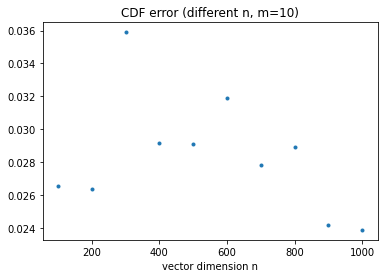

In [ ]:
k=10
m=10
samples =1000
n_list =  [i*100 for i in range(1,k+1)]
result = np.zeros(k)
for i in range(k):
    D= Rand_prod_CLT(n_list[i], m, samples)
    diff = cdf_diff(D)
    result[i] = abs(diff).max()

plt.plot(n_list, result,'.')
plt.xlabel('vector dimension n')
plt.title(f'CDF error (different n, m={m})')
plt.show()

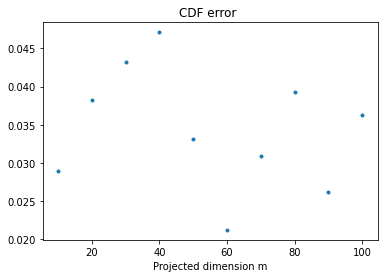

In [ ]:
k=10
samples =1000
n= 1000
m_list =  [i*10 for i in range(1,k+1)]
result = np.zeros(k)
for i in range(k):
    D= Rand_prod_CLT(n, m_list[i], samples)
    diff = cdf_diff(D)
    result[i] = abs(diff).max()

plt.plot(m_list, result,'.')
plt.xlabel('Projected dimension m')
plt.title('CDF error ')
plt.show()

## 2-2. Random projection Product-CLT ($m/n =1$)

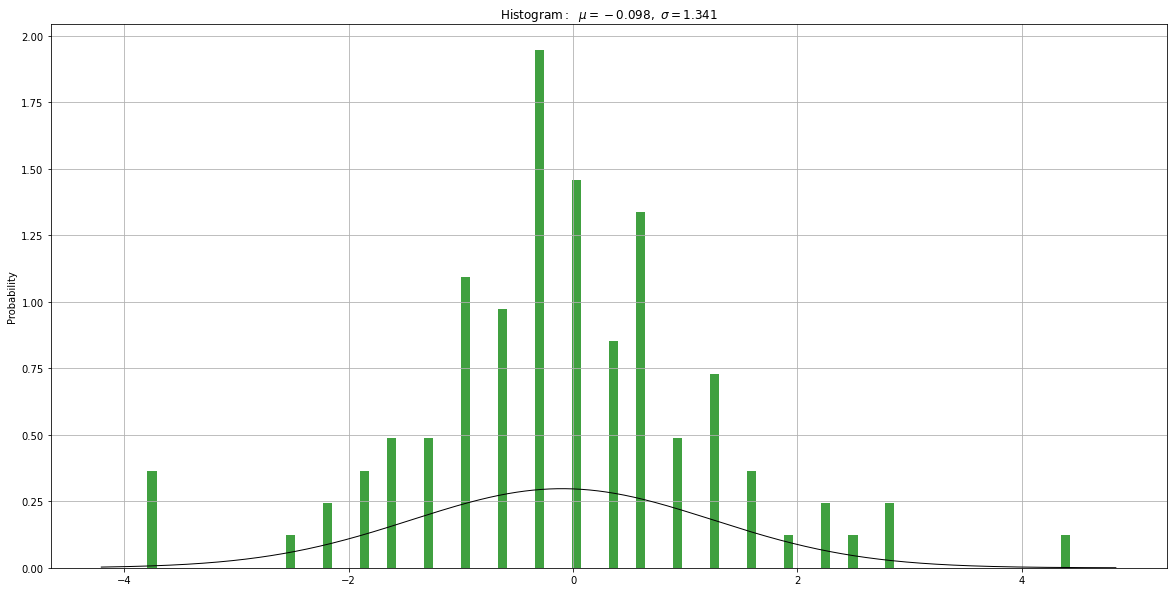

In [17]:
m=1000
n=1000
samples =100
D = Rand_prod_CLT(n, m, samples)

plot_hist(D)

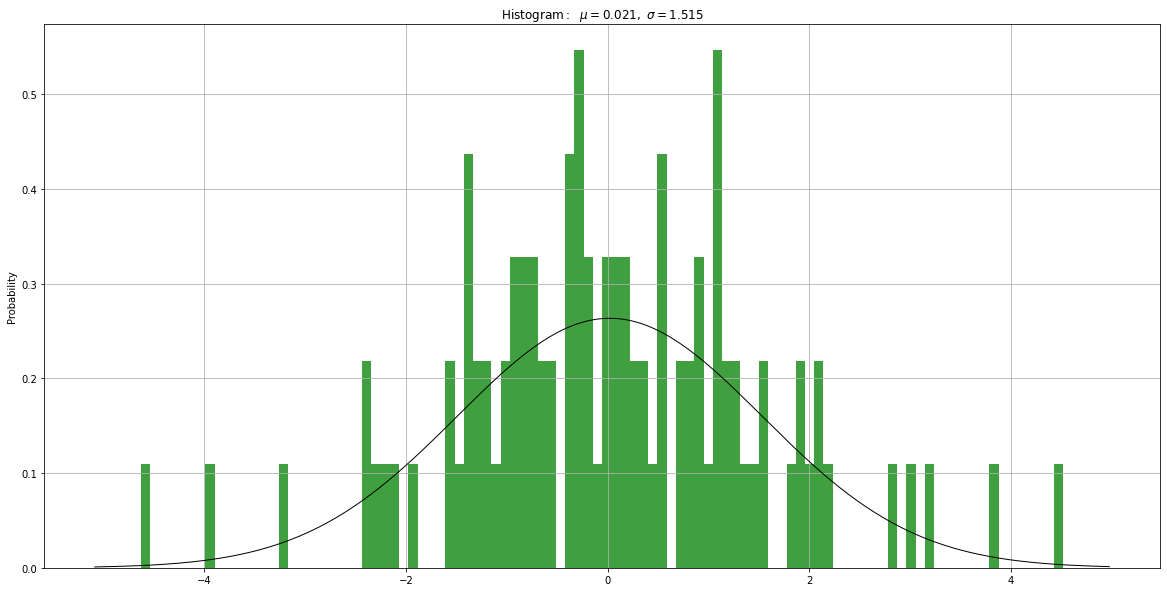

In [18]:
m=10000
n=10000
samples =100
D = Rand_prod_CLT(n, m, samples)

plot_hist(D)

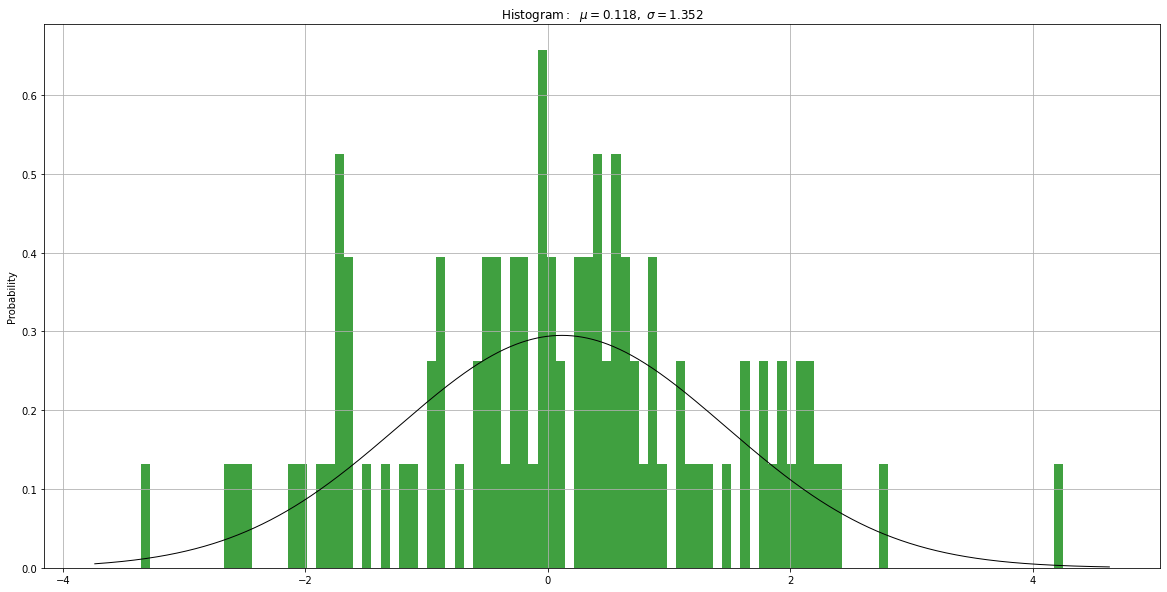

In [4]:
m=20000
n=20000
samples =100
D = Rand_prod_CLT(n, m, samples)

plot_hist(D)

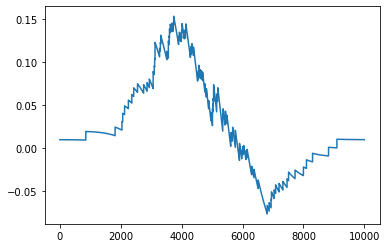

Average absolute difference of CDF between D and standard normal, 0.043010


In [116]:
diff = cdf_diff(D)
plt.plot(diff)
plt.show()
print('Average absolute difference of CDF between D and standard normal, %.6f' %abs(diff).mean())

# 2-3. Random projection Product-CLT ( m/n >1 )

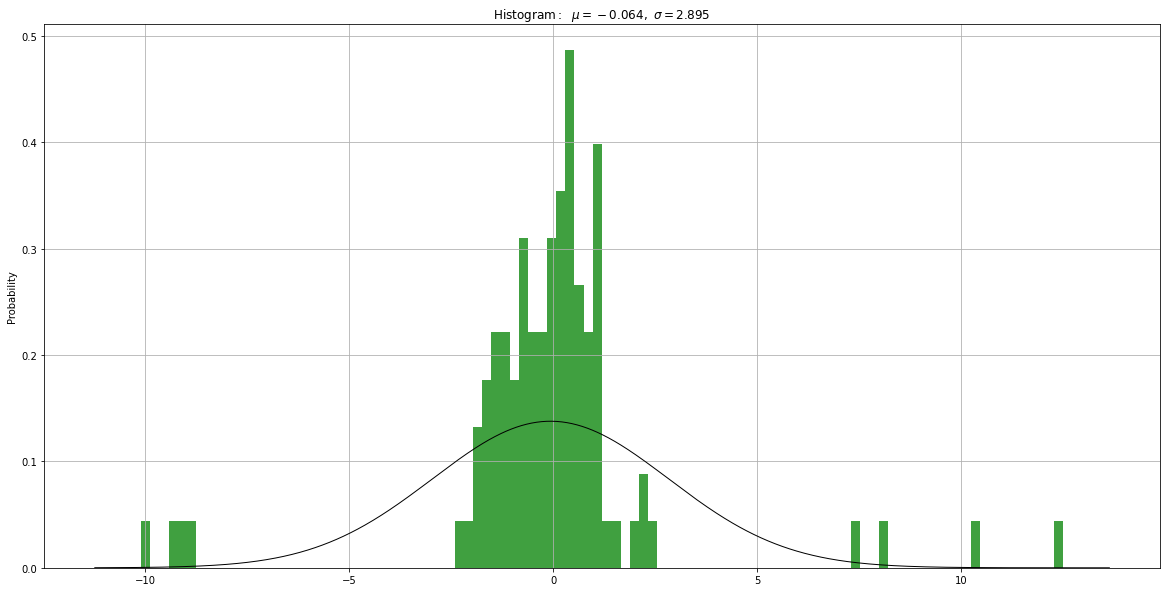

In [20]:
m=10000
n=1000
samples =100

D = Rand_prod_CLT(n, m, samples)

plot_hist(D)

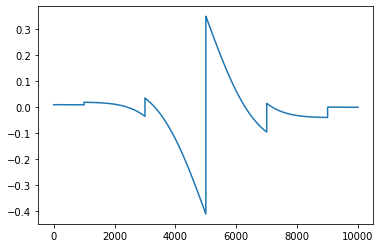

Average absolute difference of CDF between D and standard normal, 0.063865


In [ ]:
diff = cdf_diff(D)
plt.plot(diff)
plt.show()
print('Average absolute difference of CDF between D and standard normal, %.6f' %abs(diff).mean())

# 3. Conclusion

The convergence to normal distribution is verified in both cases. Due to both theoretical and computational power limitations, the rate of convergence is not verified. Specifically the theoretical limitations comes from the berry-esseen type rate is only a bound on the order of the error which could fluctutate very much with different parameters.